In [1]:
import bacteriopop_utils
import feature_selection_utils
import load_data
import dynamic_mode_decomposition as dmd
import network_construction as net
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
import os

In [3]:
#Calculation parameters:
p = 1  # percent abundance to consider significant. 
adjacency_magnitude = 1.5 # signal to trim by before plotting

In [4]:
# Only look for bacteria who are p% of the population in at least 1 sample. 
mappings, nodes = dmd.find_fixed_adjacency_matrix(p/100,'order',True)

all groups of oxygen/week/replicate have abundances that sum to 1
columns after aggregating on phylo level: Index([u'oxygen', u'replicate', u'week', u'kingdom', u'phylum', u'class',
       u'order', u'abundance'],
      dtype='object')
first (up to) 5 phylo columns to 
keep: ['' 'Acidilobales' 'Desulfurococcales' 'Sulfolobales' 'Thermoproteales']
('High', 1)
('High', 2)
('High', 3)
('High', 4)
('Low', 1)
('Low', 2)
('Low', 3)
('Low', 4)
dictionary keys: [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
dataframe_dict.keys(): [('High', 4), ('Low', 1), ('High', 3), ('Low', 2), ('High', 2), ('Low', 3), ('High', 1), ('Low', 4)]
week                                                      4         5   \
phylo_concat                                                             
Archaea,,,                                          0.000000  0.000018   
Archaea,Crenarchaeota,,                             0.000000  0.000008   
Archaea,Crenarchaeota

In [5]:
# Only pull out species that have interactions with another member with magnitude greater than 0.5
mappings, nodes = net.reduce_all_adjacency_matrixes_in_dict(mappings, nodes, 
                                                            adjacency_magnitude)

network_construction.py:105: ComplexWarning: Casting complex values to real discards the imaginary part
  new_adj[i][j] = adj[node1][node2]


In [6]:
# Convert all of the dataframes to Pandas
mappings = dmd.DMD_results_dict_from_numpy_to_pandas(mappings,nodes)
std_mappings, avg_mappings, snr_mappings = dmd.aggregate_adjacency_matrix_over_replicates(mappings)

In [7]:
# Plot them all. 

In [8]:
avg_mappings.keys()

['High', 'Low']

In [9]:
plot_dir = './plots/poster'
if not os.path.exists(plot_dir):
    os.makedirs(plot_dir)

In [10]:
net.plot_heatmap(avg_mappings['High'], 
                 'Most Significant Interactions: High Oxygen', 
                 './plots/poster/poster_high_average.pdf')

In [11]:
net.plot_heatmap(avg_mappings['Low'], 
                 'Most Significant Interactions: Low Oxygen', 
                 './plots/poster/poster_low_average.pdf')

In [12]:
net.plot_heatmap(std_mappings['High'], 
                 'Standard Deviation of Interactions: High Oxygen', 
                 './plots/poster/poster_high_std.pdf')

In [13]:
net.plot_heatmap(std_mappings['Low'], 
                 'Standard Deviation of Interactions: Low Oxygen', 
                 './plots/poster/poster_low_std.pdf')

In [14]:
net.plot_heatmap(snr_mappings['High'], 
                 'Signal To Noise: High Oxygen', 
                 './plots/poster/poster_high_sig_to_noise.pdf')

In [15]:
net.plot_heatmap(snr_mappings['High'], 
                 'Signal To Noise: High Oxygen', 
                 './plots/poster/poster_high_sig_to_noise.pdf')

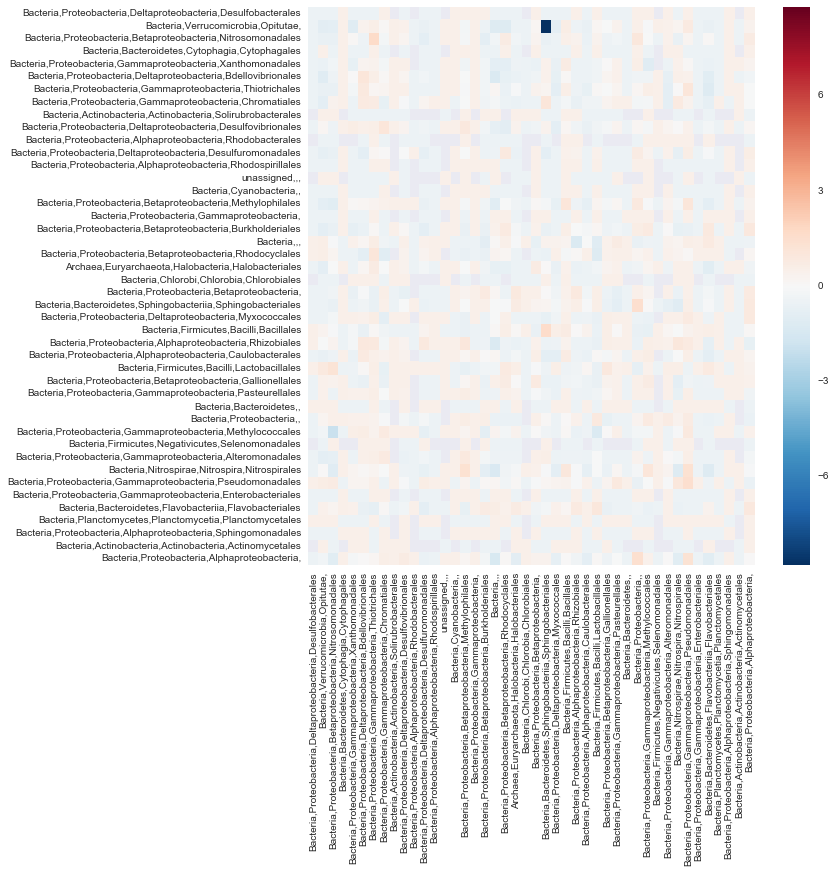

In [16]:
hmp = sns.heatmap(snr_mappings['High'])
hmp.figure.set_figwidth(10)
hmp.figure.set_figheight(10)